In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("D:\\ML-DataSets\\weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
import seaborn as sns


<Axes: xlabel='Height', ylabel='Density'>

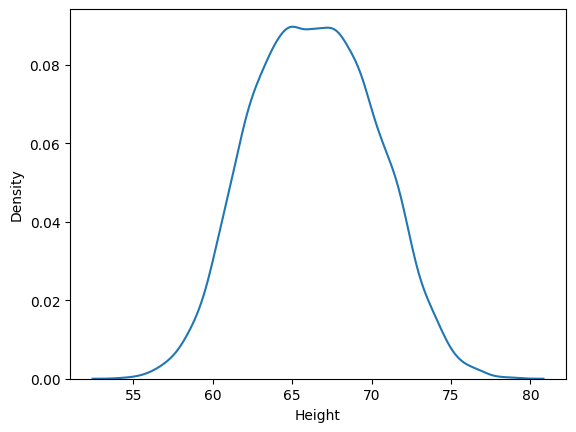

In [6]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

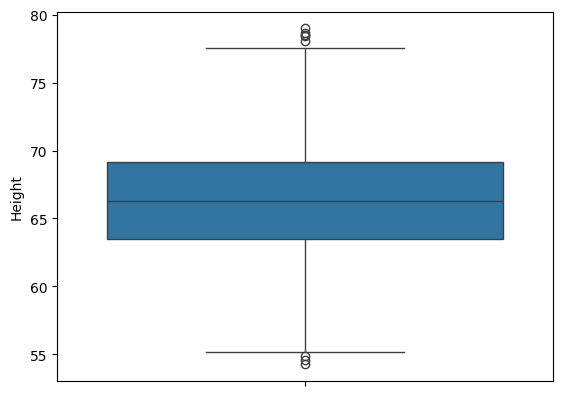

In [7]:
sns.boxplot(df['Height'])

In [8]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [16]:
# Defining the upper and lower limits using the quantile method

upper_limit = df['Height'].quantile(0.995)
lower_limit = df['Height'].quantile(0.005)
print(upper_limit)
print(lower_limit)


75.69040357130585
57.31280913400189


In [21]:
df[(df['Height']  > 75.69) | (df['Height'] < 57.31)]


,Gender,Height,Weight
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
232,Male,76.021347,235.926061
430,Male,76.027082,232.313471
673,Male,76.501883,217.882346
...,...,...,...
9462,Female,56.994456,84.414246
9760,Female,56.534166,97.743896
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534


## Trimming

In [22]:
new_df = df[(df['Height']  < 75.69) & (df['Height'] > 57.31)]

In [23]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Capping

In [24]:
df['Height'] = np.where(
    df['Height'] > upper_limit,
    upper_limit, 
    np.where(
        df['Height'] < lower_limit,
        lower_limit, 
        df['Height']
    )
)

In [25]:
df['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

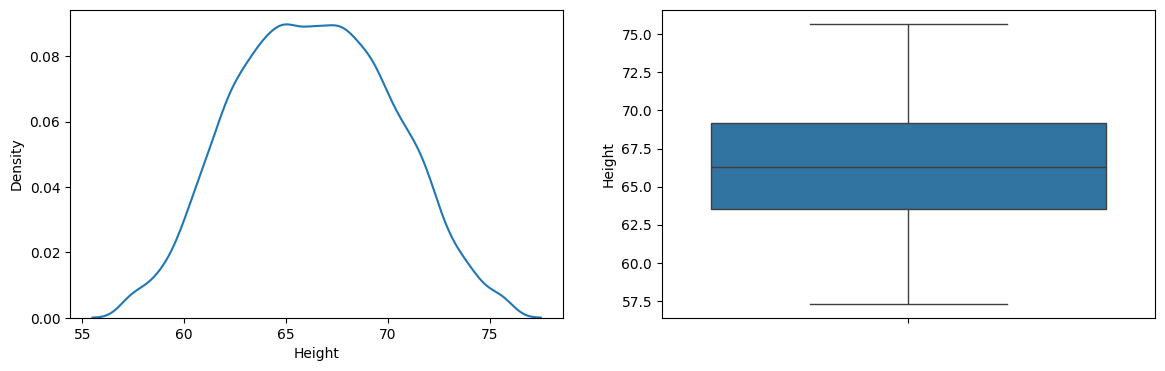

In [26]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['Height'])

plt.subplot(122)
sns.boxplot(df['Height'])

plt.show()